In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Step 2: Load the dataset
file_path = '/Users/parmikenia/Desktop/internship codes/validation dataset.csv'
df = pd.read_csv(file_path)

In [4]:
# Step 3: Display the first few rows of the dataframe
df.head()

,Customer_ID,gender,Age,demographics,profession,Income,Loan_Amount,Loan_Term_Months,Rent_Payments,Utility_Payments_On_Time,Mobile_Phone_Payment_On_Time,social mediaplatform,Social_Media_Activity_Score,Transaction_Behavior_Score,Credit_Score
0,1,male,45,Urban,Software Engineer,31654,12345,34,984,False,True,Instagram,50,67,345
1,2,female,80,Sub_Urban,Student,78252,15357,20,1260,True,False,Facebook,67,90,456
2,3,male,35,Rural,Market Manager,160424,98765,56,1464,True,False,Youtube,80,46,567
3,4,female,67,Urban,Software Engineer,134532,45678,76,745,True,False,Youtube,40,76,678
4,5,male,84,Sub_Urban,Student,105645,34567,12,1248,False,True,Facebook,39,55,789


In [5]:
# Check the shape of the dataframe
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Display basic information about the dataframe
df.info()

# Summary statistics for numerical columns
df.describe()

The dataset has 11 rows and 15 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Customer_ID                   11 non-null     int64 
 1   gender                        11 non-null     object
 2   Age                           11 non-null     int64 
 3   demographics                  11 non-null     object
 4   profession                    11 non-null     object
 5   Income                        11 non-null     int64 
 6   Loan_Amount                   11 non-null     int64 
 7   Loan_Term_Months              11 non-null     int64 
 8   Rent_Payments                 11 non-null     int64 
 9   Utility_Payments_On_Time      11 non-null     bool  
 10  Mobile_Phone_Payment_On_Time  11 non-null     bool  
 11  social mediaplatform          11 non-null     object
 12  Social_Media_Activity_Score   11 non-nul

,Customer_ID,Age,Income,Loan_Amount,Loan_Term_Months,Rent_Payments,Social_Media_Activity_Score,Transaction_Behavior_Score,Credit_Score
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,6.000000,53.181818,85715.545455,52431.454545,39.636364,1284.090909,51.454545,49.545455,687.000000
std,3.316625,22.591229,44278.725403,29120.050321,21.317940,609.560244,27.674406,21.360541,198.227142
min,1.000000,23.000000,20061.000000,12345.000000,12.000000,675.000000,9.000000,19.000000,345.000000
25%,3.500000,34.500000,53821.000000,34567.000000,20.000000,920.500000,31.500000,34.500000,555.000000
50%,6.000000,49.000000,86420.000000,45678.000000,40.000000,1057.000000,50.000000,46.000000,678.000000
75%,8.500000,72.500000,115770.500000,67673.000000,57.000000,1362.000000,72.000000,61.000000,832.500000
max,11.000000,84.000000,160424.000000,98765.000000,76.000000,2431.000000,94.000000,90.000000,987.000000


In [6]:
# Check for missing values
print(df.isnull().sum())

Customer_ID                     0
gender                          0
Age                             0
demographics                    0
profession                      0
Income                          0
Loan_Amount                     0
Loan_Term_Months                0
Rent_Payments                   0
Utility_Payments_On_Time        0
Mobile_Phone_Payment_On_Time    0
social mediaplatform            0
Social_Media_Activity_Score     0
Transaction_Behavior_Score      0
Credit_Score                    0
dtype: int64


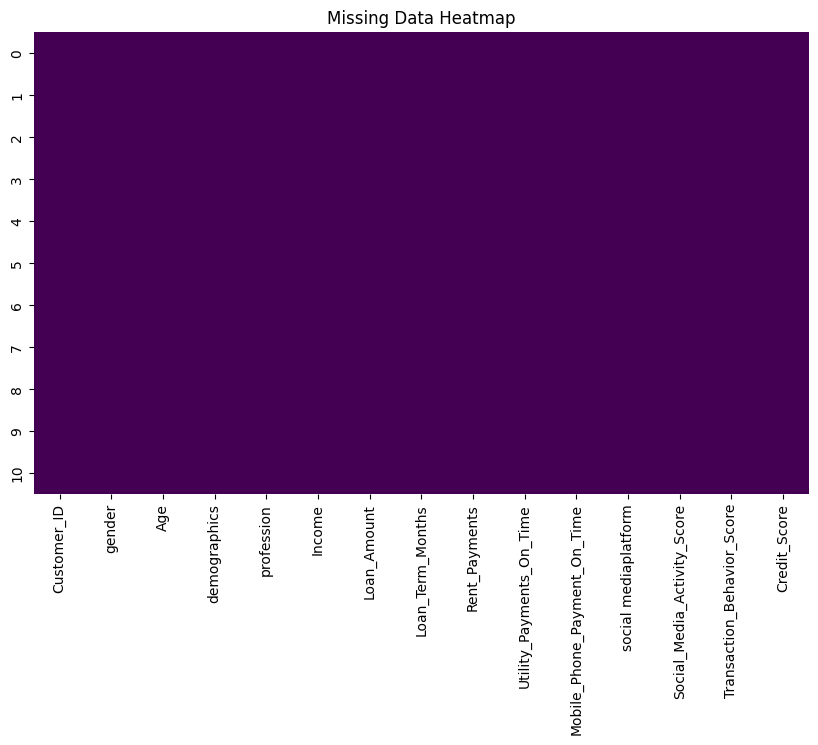

In [7]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [8]:
# Drop columns with too many missing values
missing_threshold = 0.5
df = df[df.columns[df.isnull().mean() < missing_threshold]]

In [9]:
# Fill missing values for numerical columns with the median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to binary columns
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = label_enc.fit_transform(df[col])

# Apply One-Hot Encoding to categorical columns with more than two categories
df = pd.get_dummies(df, columns=[col for col in categorical_cols if df[col].nunique() > 2])

In [11]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Exclude the 'Age' column from scaling
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('Age', errors='ignore')

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns excluding 'Age'
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [12]:
# Display the first few rows of the cleaned dataframe
df.head()

,Customer_ID,gender,Age,Income,Loan_Amount,Loan_Term_Months,Rent_Payments,Utility_Payments_On_Time,Mobile_Phone_Payment_On_Time,Social_Media_Activity_Score,...,demographics_Rural,demographics_Sub_Urban,demographics_Urban,demographics_Urban,profession_Market Manager,profession_Software Engineer,profession_Student,social mediaplatform_Facebook,social mediaplatform_Instagram,social mediaplatform_Youtube
0,-1.581139,0.912871,45,-1.280530,-1.443783,-0.277300,-0.516336,False,True,-0.055125,...,False,False,True,False,False,True,False,False,True,False
1,-1.264911,-1.095445,80,-0.176785,-1.335300,-0.966078,-0.041451,True,False,0.589144,...,False,True,False,False,False,False,True,True,False,False
2,-0.948683,0.912871,35,1.769583,1.668783,0.805065,0.309551,True,False,1.081820,...,True,False,False,False,True,False,False,False,False,True
3,-0.632456,-1.095445,67,1.156292,-0.243237,1.789033,-0.927559,True,False,-0.434106,...,False,False,False,True,False,True,False,False,False,True
4,-0.316228,0.912871,84,0.472059,-0.643419,-1.359665,-0.062098,False,True,-0.472004,...,False,True,False,False,False,False,True,True,False,False


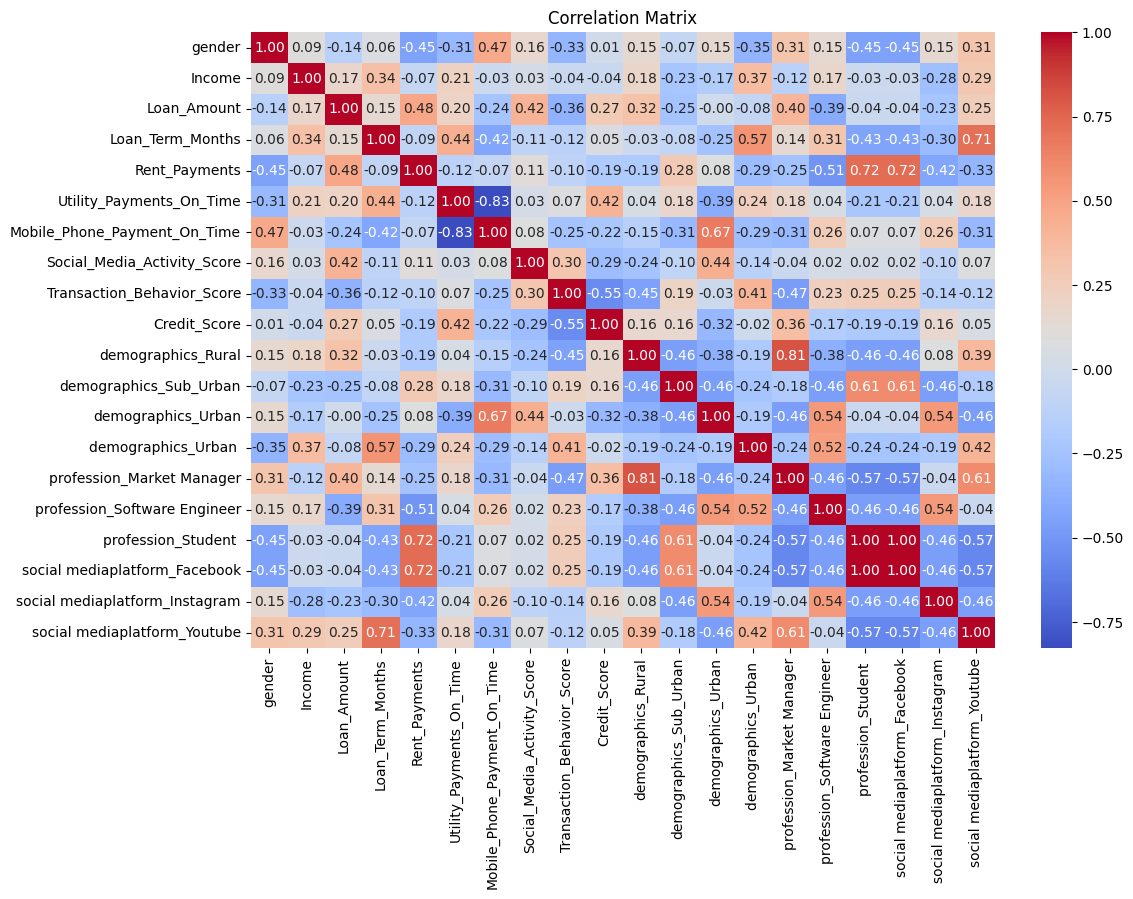

In [13]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Age','Customer_ID']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

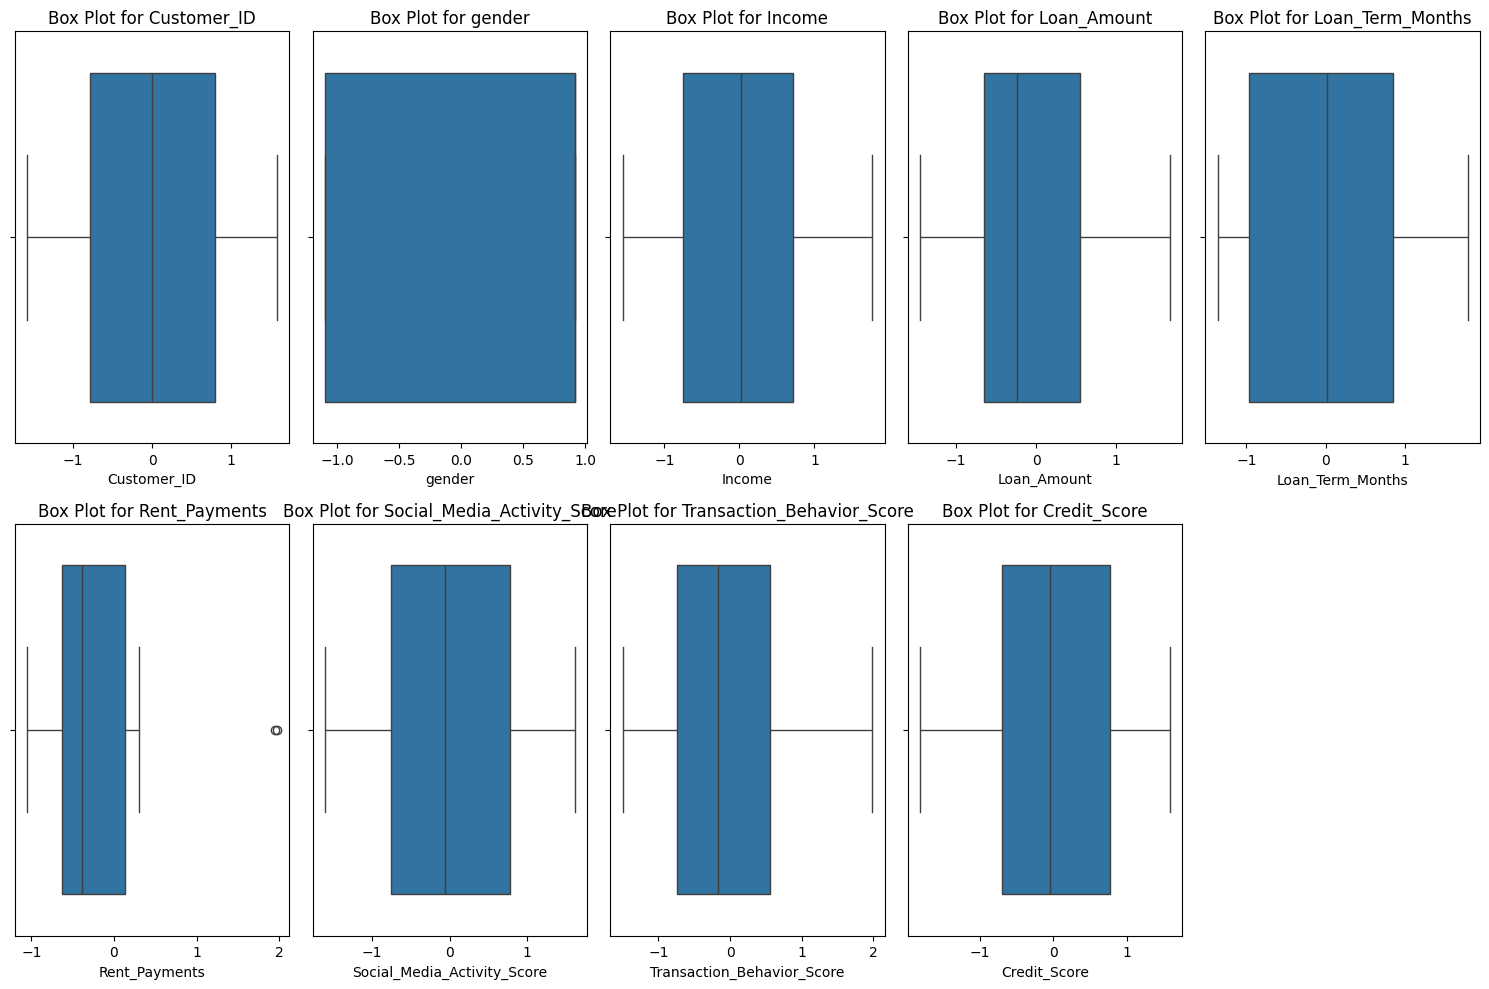

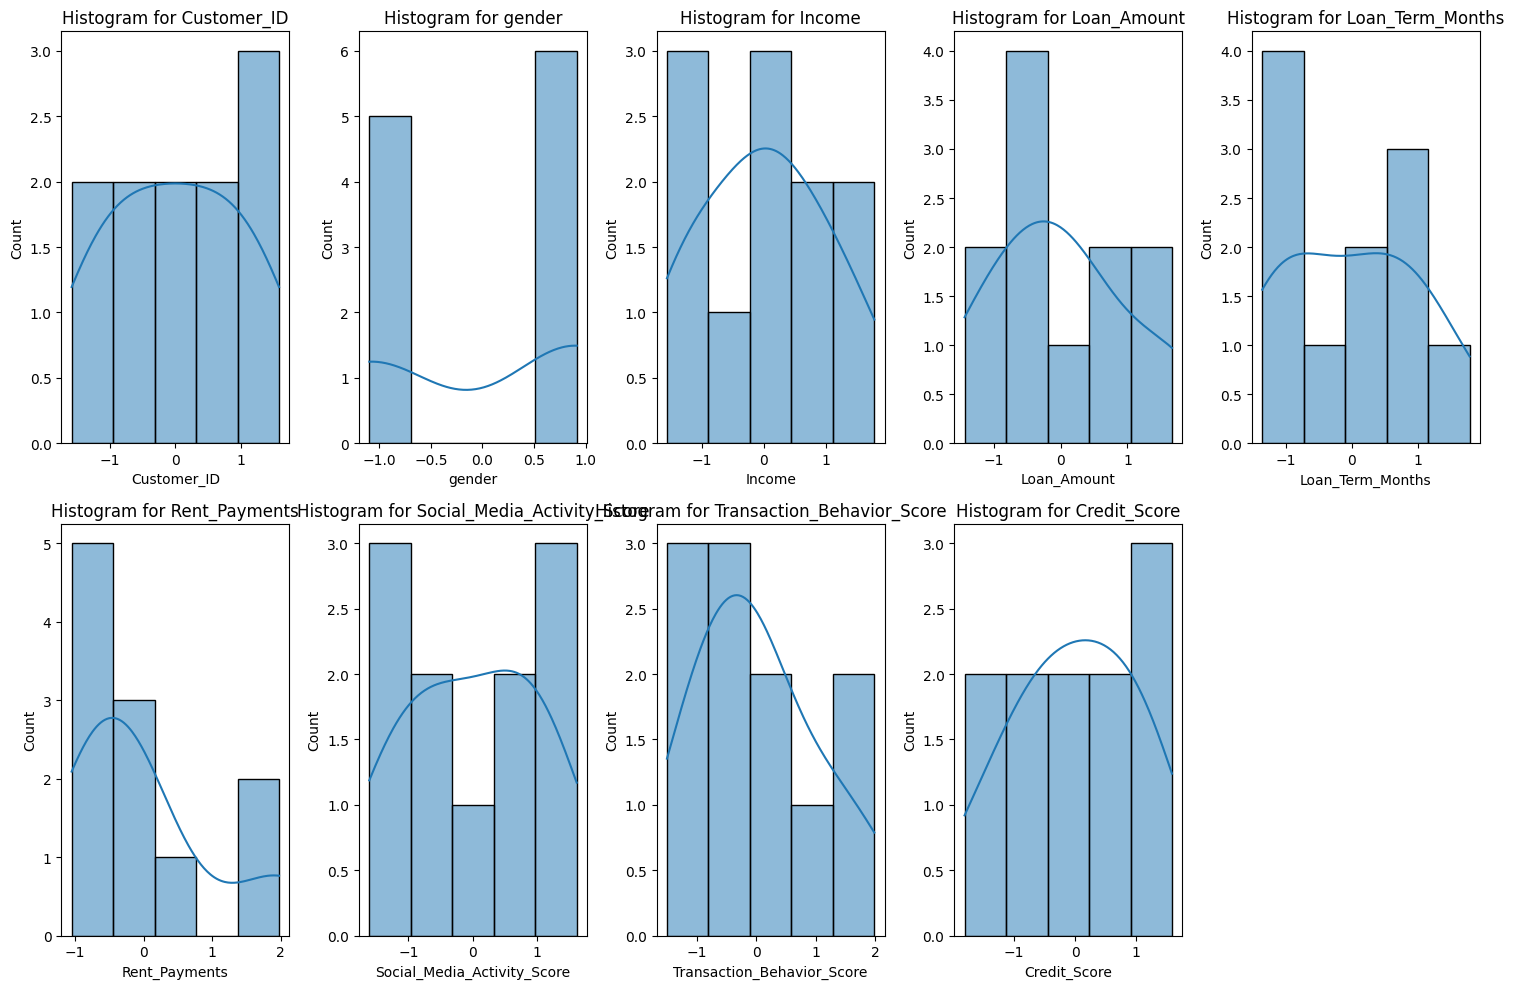

In [14]:
# Visualizing outliers using box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

# Visualizing the distribution of each numerical feature using histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col}')
plt.tight_layout()
plt.show()

In [15]:
# Outlier Detection using Z-Score Method
from scipy.stats import zscore

z_scores = np.abs(zscore(df[numerical_cols]))
z_threshold = 3
outliers = np.where(z_scores > z_threshold)
print(f"Number of outliers detected using Z-score method: {len(outliers[0])}")
df = df[(z_scores < z_threshold).all(axis=1)]
print(f"Dataframe shape after removing outliers using Z-score method: {df.shape}")

# Outlier Detection using IQR Method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))
print(f"Number of outliers detected using IQR method: {outliers_iqr.sum().sum()}")
df = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
print(f"Dataframe shape after removing outliers using IQR method: {df.shape}")

Number of outliers detected using Z-score method: 0
Dataframe shape after removing outliers using Z-score method: (11, 22)
Number of outliers detected using IQR method: 2
Dataframe shape after removing outliers using IQR method: (9, 22)


In [16]:
#Treating the outliers
for col in numerical_cols:
    # Calculate IQR bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the median (or use mean if preferred)
    median_value = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])


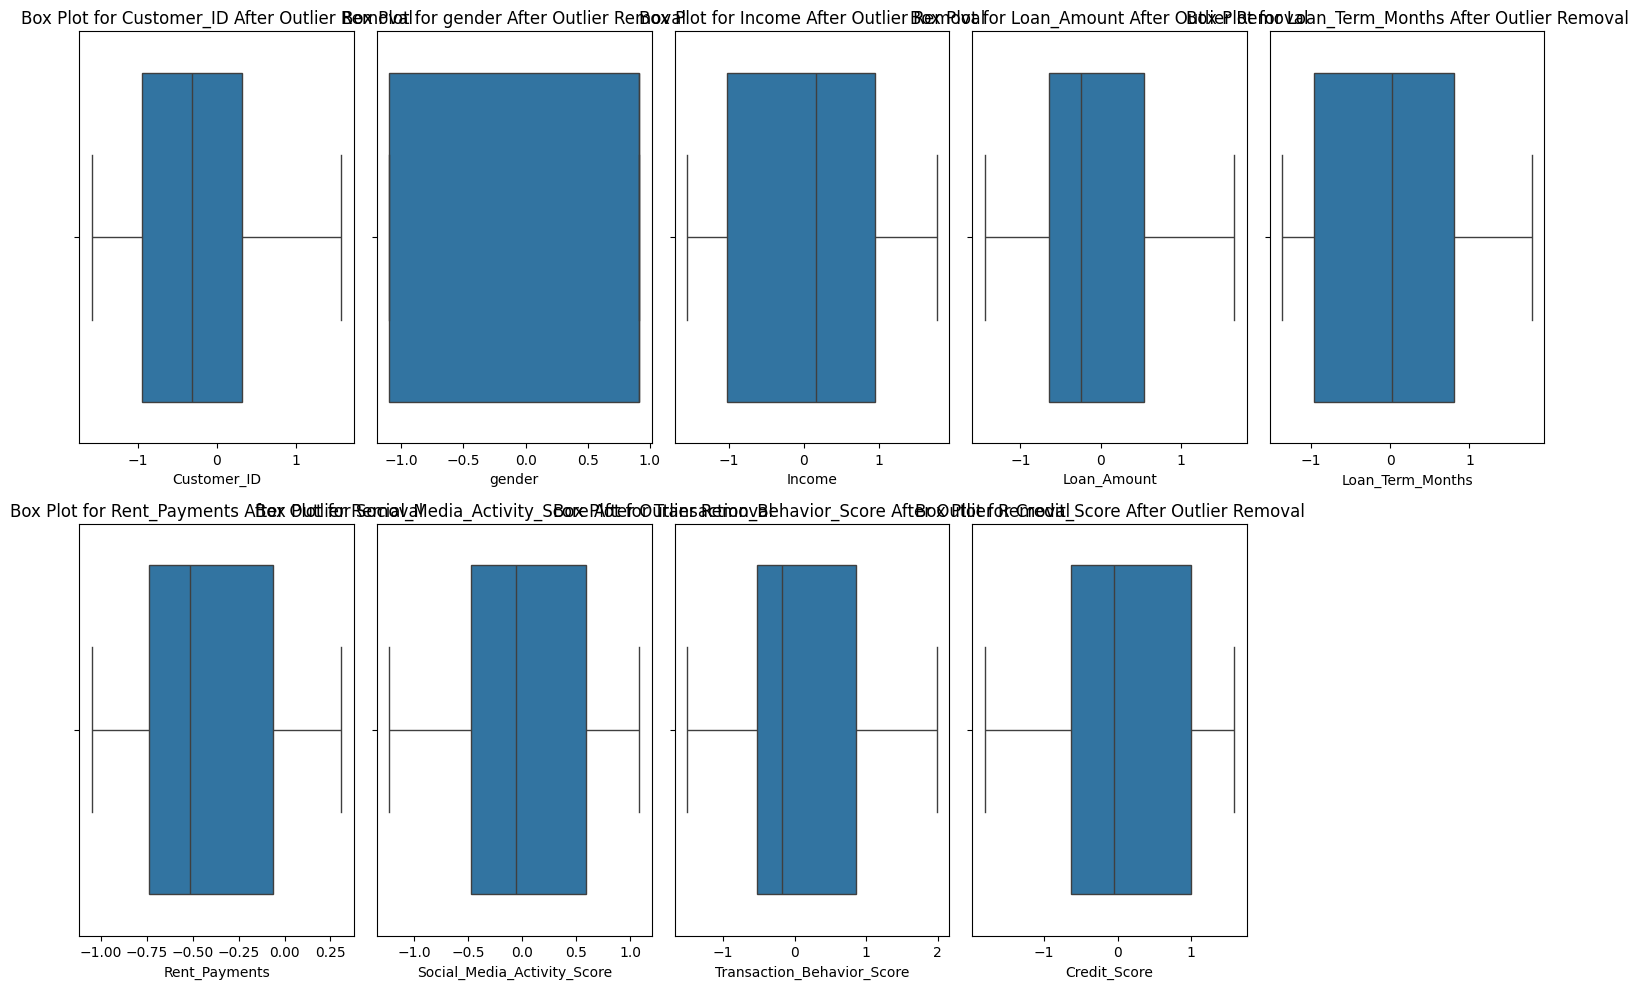

In [19]:
# Review dataset after outlier removal
df.head()
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col} After Outlier Removal')
plt.tight_layout()
plt.show()

In [18]:
# Outlier Detection using Z-Score Method
from scipy.stats import zscore

z_scores = np.abs(zscore(df[numerical_cols]))
z_threshold = 3
outliers = np.where(z_scores > z_threshold)
print(f"Number of outliers detected using Z-score method: {len(outliers[0])}")
df = df[(z_scores < z_threshold).all(axis=1)]
print(f"Dataframe shape after removing outliers using Z-score method: {df.shape}")

# Outlier Detection using IQR Method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))
print(f"Number of outliers detected using IQR method: {outliers_iqr.sum().sum()}")
df = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
print(f"Dataframe shape after removing outliers using IQR method: {df.shape}")

Number of outliers detected using Z-score method: 0
Dataframe shape after removing outliers using Z-score method: (9, 22)
Number of outliers detected using IQR method: 0
Dataframe shape after removing outliers using IQR method: (9, 22)


In [20]:
# Re-initialize numerical columns (since dataframe might have changed after outlier removal)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('Age', errors='ignore')

In [21]:
# Step 8a: Scaling using StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns using StandardScaler excluding 'Age'
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [22]:
# # Display the first few rows of the scaled dataframe
print("Data after scaling with StandardScaler:")
print(df.head())

Data after scaling with StandardScaler:
   Customer_ID    gender  Age    Income  Loan_Amount  Loan_Term_Months  \
0    -1.401826  0.707107   45 -1.219729    -1.333714         -0.272375   
1    -1.078328 -1.414214   80 -0.209384    -1.217536         -0.958762   
2    -0.754829  0.707107   35  1.572281     1.999650          0.806231   
3    -0.431331 -1.414214   67  1.010887    -0.048005          1.786783   
4    -0.107833  0.707107   84  0.384555    -0.476575         -1.350982   

   Rent_Payments  Utility_Payments_On_Time  Mobile_Phone_Payment_On_Time  \
0      -0.191223                     False                          True   
1       0.945138                      True                         False   
2       1.785057                      True                         False   
3      -1.175247                      True                         False   
4       0.895731                     False                          True   

   Social_Media_Activity_Score  ...  demographics_Rural  \

In [23]:
numerical_cols

Index(['Customer_ID', 'gender', 'Income', 'Loan_Amount', 'Loan_Term_Months',
       'Rent_Payments', 'Social_Media_Activity_Score',
       'Transaction_Behavior_Score', 'Credit_Score'],
      dtype='object')

In [24]:
# Step 8b: Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform the numerical columns using MinMaxScaler excluding 'Age'
df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the normalized dataframe
print("Data after normalization with MinMaxScaler:")

Data after normalization with MinMaxScaler:


In [25]:
print(df.head())

   Customer_ID  gender  Age    Income  Loan_Amount  Loan_Term_Months  \
0          0.0     1.0   45  0.082593     0.000000           0.34375   
1          0.1     0.0   80  0.414575     0.034853           0.12500   
2          0.2     1.0   35  1.000000     1.000000           0.68750   
3          0.3     0.0   67  0.815535     0.385709           1.00000   
4          0.4     1.0   84  0.609733     0.257140           0.00000   

   Rent_Payments  Utility_Payments_On_Time  Mobile_Phone_Payment_On_Time  \
0       0.391635                     False                          True   
1       0.741445                      True                         False   
2       1.000000                      True                         False   
3       0.088720                      True                         False   
4       0.726236                     False                          True   

   Social_Media_Activity_Score  ...  demographics_Rural  \
0                     0.508197  ...               F

In [26]:
# Save the cleaned and preprocessed dataset
df.to_csv('/Users/parmikenia/Desktop/internship codes/validation dataset2.csv', index=False)
print("Cleaned and preprocessed data saved.")

Cleaned and preprocessed data saved.
